# What Makes a Pokémon Legendary?

### Importing Data

In [192]:
library(tidyverse)

pokemon <- read_csv("./pokemon_dataset.csv",
                    col_types = cols(name = col_factor(),
                                     type = col_factor(),
                                     is_legendary = col_factor()))

head(pokemon)
str(pokemon)

attack,capture_rate,defense,height_m,hp,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type,weight_kg,generation,is_legendary,popularity_score
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>
49,45,49,0.7,45,Bulbasaur,88.1,1,65,65,45,grass,6.9,1,0,44.40
62,45,63,1.0,60,Ivysaur,88.1,2,80,80,60,grass,13.0,1,0,48.75
100,45,123,2.0,80,Venusaur,88.1,3,122,120,80,grass,100.0,1,0,59.75
52,45,43,0.6,39,Charmander,88.1,4,60,50,65,fire,8.5,1,0,44.45
64,45,58,1.1,58,Charmeleon,88.1,5,80,65,80,fire,19.0,1,0,49.25
104,45,78,1.7,78,Charizard,88.1,6,159,115,100,fire,90.5,1,0,60.70


spc_tbl_ [801 × 16] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ attack          : num [1:801] 49 62 100 52 64 104 48 63 103 30 ...
 $ capture_rate    : chr [1:801] "45" "45" "45" "45" ...
 $ defense         : num [1:801] 49 63 123 43 58 78 65 80 120 35 ...
 $ height_m        : num [1:801] 0.7 1 2 0.6 1.1 1.7 0.5 1 1.6 0.3 ...
 $ hp              : num [1:801] 45 60 80 39 58 78 44 59 79 45 ...
 $ name            : Factor w/ 801 levels "Bulbasaur","Ivysaur",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ percentage_male : num [1:801] 88.1 88.1 88.1 88.1 88.1 88.1 88.1 88.1 88.1 50 ...
 $ pokedex_number  : num [1:801] 1 2 3 4 5 6 7 8 9 10 ...
 $ sp_attack       : num [1:801] 65 80 122 60 80 159 50 65 135 20 ...
 $ sp_defense      : num [1:801] 65 80 120 50 65 115 64 80 115 20 ...
 $ speed           : num [1:801] 45 60 80 65 80 100 43 58 78 45 ...
 $ type            : Factor w/ 18 levels "grass","fire",..: 1 1 1 2 2 2 3 3 3 4 ...
 $ weight_kg       : num [1:801] 6.9 13 100 8.5 19 90.5 9 22.5 85.5 2.9 ...
 $

### Cleaning Data

In [193]:
pokemon <- pokemon[!is.na(pokemon$weight_kg) & !is.na(pokemon$height_m),]

## How many Pokemon's are Legendary?

We can see that only 9 percent of the total pokemon count are legendary

In [194]:
legendary_pokemon <- pokemon %>% count(is_legendary) %>% 
  mutate(prop = (n / nrow(pokemon)) * 100)

legendary_pokemon

is_legendary,n,prop
<fct>,<int>,<dbl>
0,712,91.165173
1,69,8.834827


### Legendary Pokemon by Height and Weight

We are printing Pokemon's name if it is taller than 7.5m or heavier than 600kgs

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 20 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 20 rows containing missing values or values outside the scale range
(`geom_point()`)."
Warning message:
"Removed 20 rows containing missing values or values outside the scale range
(`geom_text()`)."


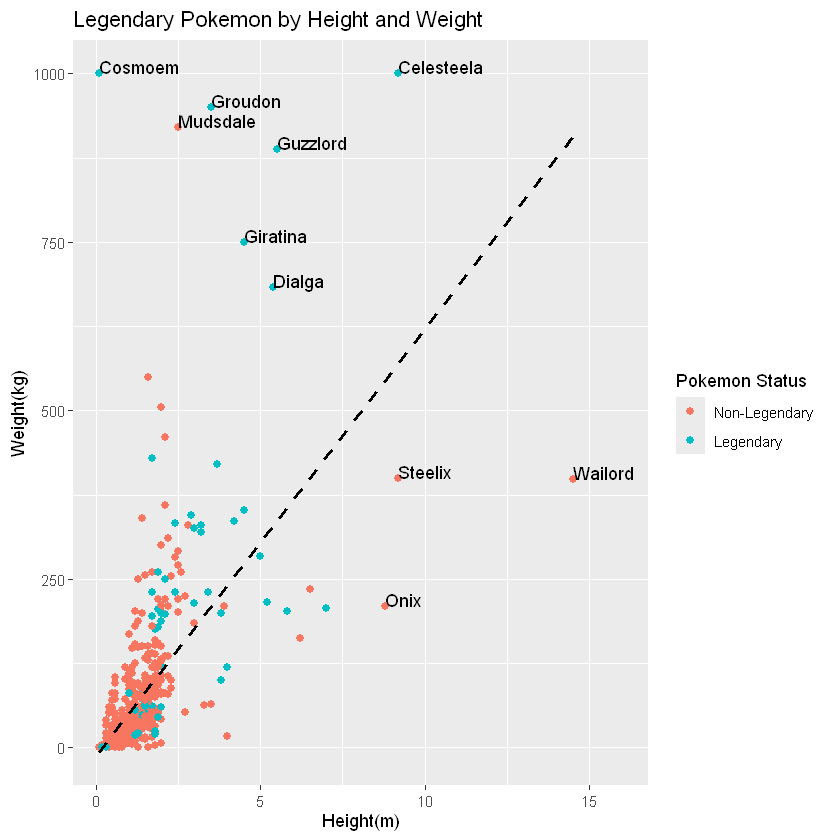

In [195]:
legendary_by_htwt_plot <- pokemon %>%
  ggplot(aes(x = height_m, y = weight_kg)) +
  geom_point(aes(color = is_legendary), size = 2) +
  geom_text(aes(label = ifelse(height_m > 7.5 | weight_kg > 600, as.character(name), '')),
            vjust = 0, hjust = 0) +
  geom_smooth(method = "lm", se = FALSE, col = "black", linetype = "dashed") +
  expand_limits(x = 16) +
  labs(title = "Legendary Pokemon by Height and Weight",
       x = "Height(m)", y = "Weight(kg)") +
  guides(color = guide_legend(title = "Pokemon Status")) +
  scale_color_manual(labels = c("Non-Legendary", "Legendary"),
                     values = c("#F87660", "#00BFC4"))

legendary_by_height_weight

### Legendary Pokemon by Type

There are 18 possible types

In [196]:
legendary_by_type <- pokemon %>%
  group_by(type) %>%
  mutate(is_legendary = as.numeric(is_legendary) - 1) %>%
  summarise(prop_legendary = mean(is_legendary)) %>%
  mutate(type = fct_reorder(type, prop_legendary))

legendary_by_type

type,prop_legendary
<fct>,<dbl>
grass,0.05194805
fire,0.10000000
water,0.05263158
bug,0.04166667
normal,0.02970297
poison,0.00000000
electric,0.13157895
ground,0.07407407
fairy,0.05555556


Plotting the spread of is_legendary status by Pokemon type

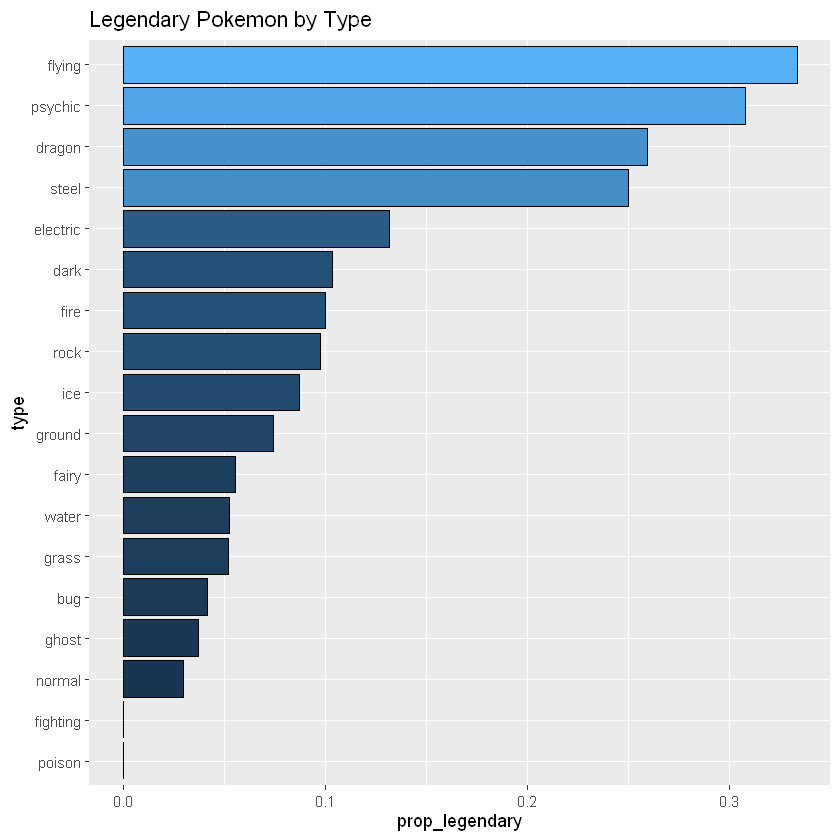

In [197]:
legendary_by_type_plot <- legendary_by_type %>%
  ggplot(aes(x = type, y = prop_legendary, fill = prop_legendary)) +
  geom_col(color = 'black') +
  labs(title = "Legendary Pokemon by Type") +
  coord_flip() +
  guides(fill = "none")

legendary_by_type_plot

### Legendary Pokemon by fighter stats

Using boxplot to visualize the influence of Pokemon figher stats -> attack, defence, hp, sp_attack, sp_defence, speed. We'll consider each stat in isolation

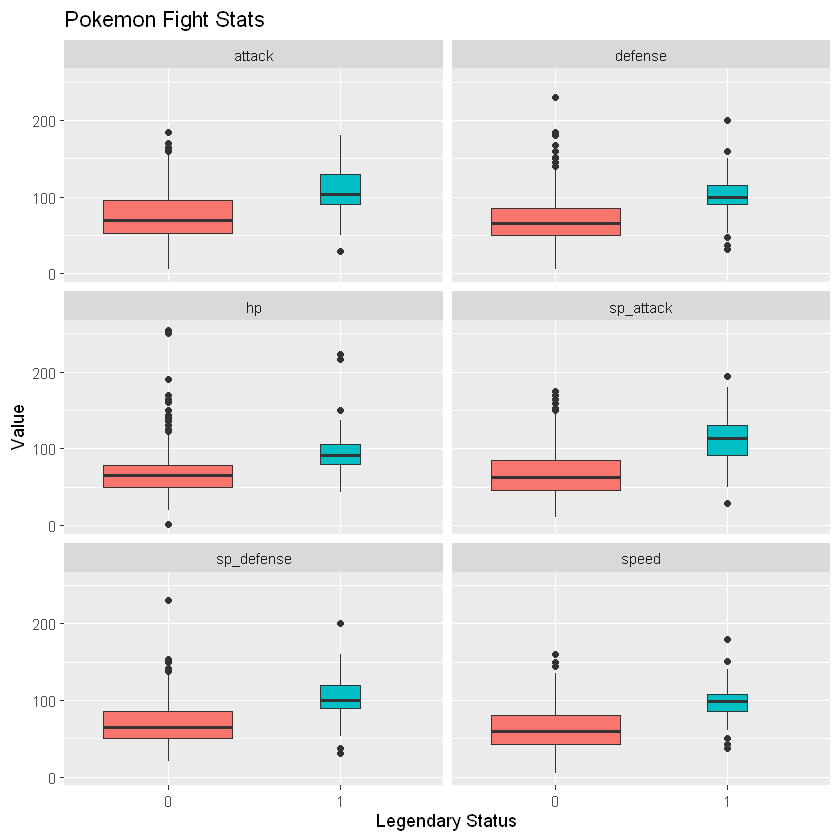

In [198]:
legendary_by_stats <- pokemon %>%
  select(is_legendary, attack, sp_attack, defense, sp_defense, hp, speed) %>%
  pivot_longer(cols = -is_legendary, names_to = "fighter_stats", values_to = "value")

legendary_by_stats_plot <- legendary_by_stats %>%
  ggplot(aes(x = is_legendary, y = value, fill = is_legendary)) +
  geom_boxplot(varwidth = TRUE) +
  facet_wrap(~fighter_stats, ncol = 2) +
  labs(title = "Pokemon Fight Stats", x = "Legendary Status", y = "Value") +
  guides(fill = "none")

legendary_by_stats_plot

### Creating train/test Split

In [199]:
set.seed(42)

n <- nrow(pokemon)
sample_rows <- sample(n, 0.7 * n)

pokemon_train <- pokemon %>%
  filter(row_number() %in% sample_rows)
pokemon_test <- pokemon %>%
  filter(!row_number() %in% sample_rows)

### Fitting a decision tree

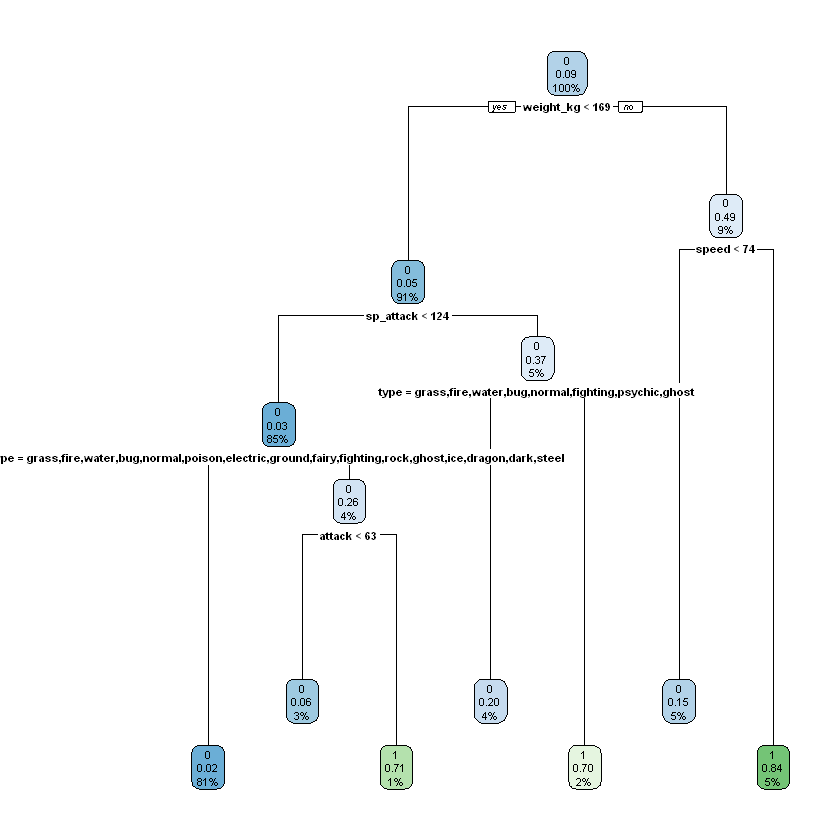

In [200]:
library(rpart)
library(rpart.plot)
set.seed(42)

model_tree <- rpart(is_legendary ~ attack + defense + height_m +
                      hp + sp_attack + sp_defense + speed + type + weight_kg, 
                    data = pokemon_train,
                    method = "class",
                    na.action = na.omit)

rpart.plot(model_tree)

### Fitting a Random Forest

In [201]:
library(randomForest)
set.seed(42)

model_forest <- randomForest(is_legendary ~ attack + defense + height_m + hp +
                              sp_attack + sp_defense + speed + type + weight_kg,
                             data = pokemon_train, 
                             importance = TRUE,
                             na.action = na.omit)

print(model_forest)


Call:
 randomForest(formula = is_legendary ~ attack + defense + height_m +      hp + sp_attack + sp_defense + speed + type + weight_kg, data = pokemon_train,      importance = TRUE, na.action = na.omit) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 6.41%
Confusion matrix:
    0  1 class.error
0 488  7  0.01414141
1  28 23  0.54901961


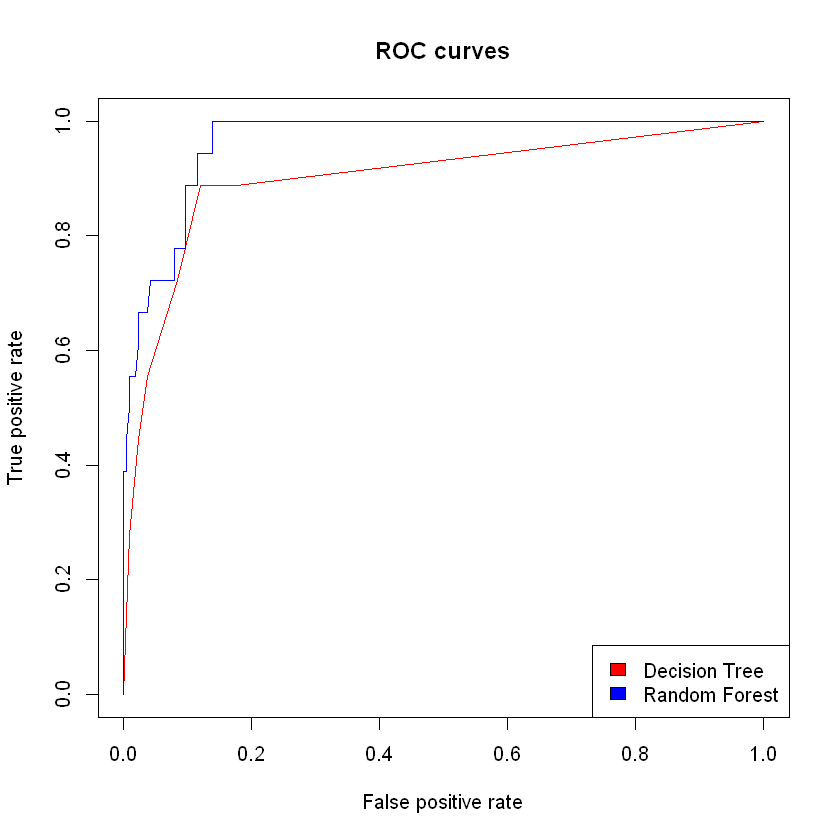

In [202]:
library(ROCR)

probs_tree <- predict(model_tree, pokemon_test, type = "prob")
pred_tree <- prediction(probs_tree[, 2], pokemon_test$is_legendary)
perf_tree <- performance(pred_tree, "tpr", "fpr")

probs_forest <- predict(model_forest, pokemon_test, type = "prob")
pred_forest <- prediction(probs_forest[, 2], pokemon_test$is_legendary)
perf_forest <- performance(pred_forest, "tpr", "fpr")

plot(perf_tree, col = "red", main = "ROC curves")
plot(perf_forest, add = TRUE, col = "blue")
legend(x = "bottomright", legend = c("Decision Tree", "Random Forest"), fill = c("red", "blue"))

### Analysing Variable Importance

,MeanDecreaseAccuracy,MeanDecreaseGini
attack,8.549683,6.127094
defense,10.324323,7.531940
height_m,11.977763,8.970587
hp,17.478741,11.263518
sp_attack,16.451237,12.623153
sp_defense,3.162052,5.991597
speed,18.318616,13.463172
type,10.100398,12.882612
weight_kg,15.107947,14.338557


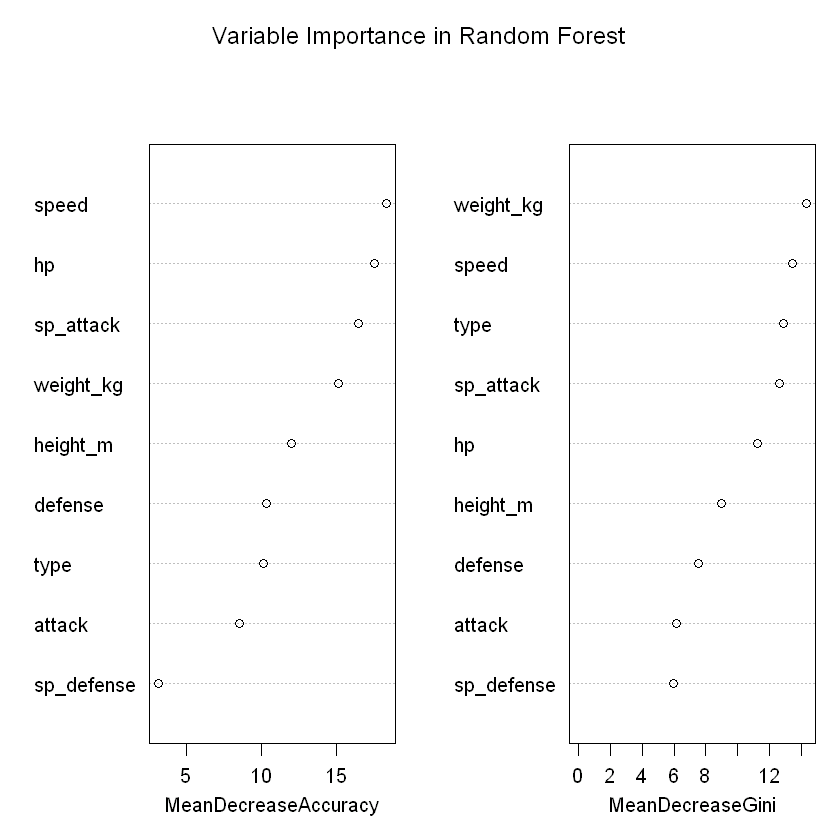

In [203]:
varImpPlot_forest <- varImpPlot(model_forest, 
                                main = "Variable Importance in Random Forest")
varImpPlot_forest